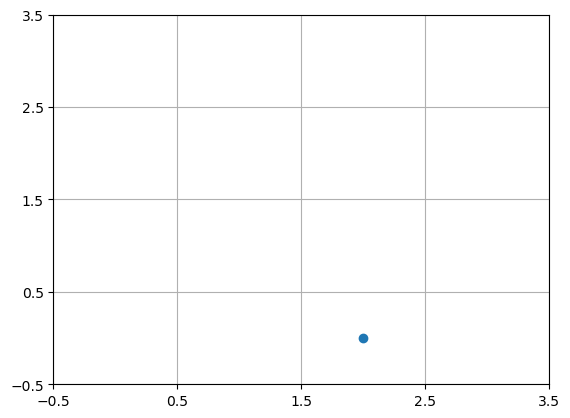

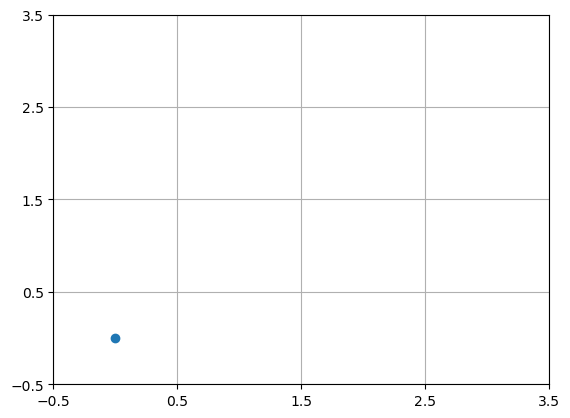

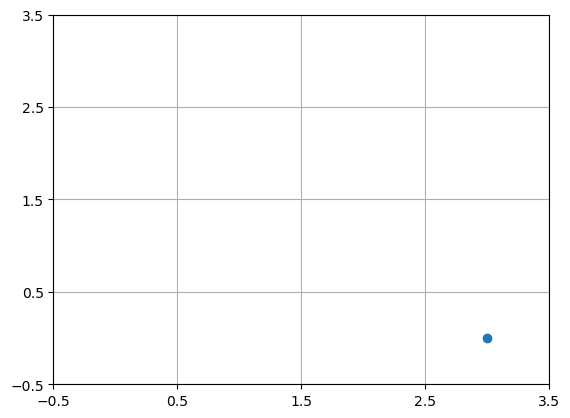

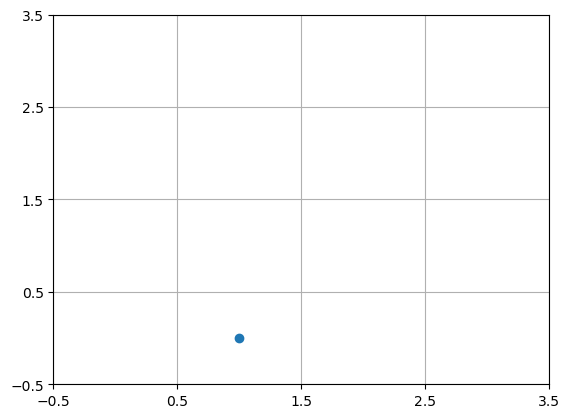

In [5]:
"""
NQLL-p
N-queens linked lists python version
Dr Keith Reid
Coding Club
Jan 2024
"""

import numpy as np
import matplotlib.pyplot as plt

class Config:
    def __init__(self):
        self.n = get_n()

class Node:
    def __init__(self, x, y, prev, succ, flavour):        
        self.x          = x
        self.y          = y
        self.prev       = prev
        self.succ       = succ
        self.flavour    = flavour

def get_n():
    n                   = 4
    return n

def get_config():
    config = Config()
    return config

def count_diagonal_intersections(coords, current):
    
    # 000000
    # 000000
    # 0I0IU0
    # 00C000
    # 000000
    # 000000
    
    coords_x                = coords[0]
    coords_y                = coords[1]
    succ_height             = current.y+1
    height                  = succ_height - coords_y
    left_intersect_x        = coords_x   - height 
    right_intersect_x       = coords_x   + height 
    diagonal_intersections  = [[left_intersect_x, succ_height],[right_intersect_x, succ_height]]
    return diagonal_intersections

def init_dyad():
                
    config      = get_config()
    n           = config.n
    # name     type  x    y    prev          succ     flav
    alpha       = Node(0.5, -1,  'before',   None,    'A')
    omega       = Node(0.5,  n+1,  None,    'after',  'O')
    alpha.succ  = omega
    omega.prev  = alpha
    dyad        = [alpha, omega]
    return dyad

def read_node_path(this_node):
    path           = []
    this_node_xy   = [this_node.x, this_node.y]
    path.append(this_node_xy)
    while this_node.succ != 'after':
        next_node = this_node.succ
        next_x    = next_node.x
        next_y    = next_node.y
        next_xy   = [next_x, next_y]
        path.append(next_xy)
        this_node = next_node
    return path
    
def draw(path):
        
    fig = plt.figure()
    plt.xlim(-0.5, config.n-0.5)
    plt.ylim(-0.5, config.n-0.5)
    ax  = fig.gca()
    ax.set_xticks(np.arange(-0.5, config.n+0.5, 1))
    ax.set_yticks(np.arange(-0.5, config.n+0.5, 1))
    plt.scatter([p[0] for p in path],[p[1] for p in path])
    plt.grid()
    plt.show()
    
if __name__=="__main__":
    config       = get_config()
    dyad         = init_dyad()
    alpha        = dyad[0]
    omega        = dyad[1]
    
    alpha_set    = alpha
    last_trees   = alpha_set
    
    #  [omega...       ]
    #      ^
    #     / \
    #      |
    #      |
    #    alpha
    
    
    # chessboard constructor
    
    board = set(dyad)
    for i in range(config.n):
        for j in range(config.n):
            this_queen = Node(i,j,None,omega,'Q')
            board.add(this_queen)
    
    # solutions
    
    trees = set()
    
    # trial of each nodes options
           
    current         = alpha
    prior_coords    = read_node_path(current)
    taken_xs        = list(set(list([xy[0] for xy in prior_coords])))
    options         = [other   for other   in board    if other != current]
    next_ups        = [option  for option  in options  if option.y == current.y+1]
    not_taken       = [next_up for next_up in next_ups if next_up.x not in taken_xs]
    diag_bans     = []
    for this_xy in prior_coords:
        banned_cells    = count_diagonal_intersections(this_xy, current)
        left_diag_ban   = banned_cells[0][0]
        right_diag_ban  = banned_cells[1][0]
        diag_bans.append(left_diag_ban)
        diag_bans.append(right_diag_ban)
    successors      = [this_not_taken for this_not_taken in not_taken if this_not_taken.x not in diag_bans]
    
    new_roots       = set()
    for this_successor in successors:
        new                 = Node(alpha.x, alpha.y, alpha.prev, alpha.succ, alpha.flavour)
        this_successor.prev = new
        new.succ            = this_successor
        new_roots.add(new)
    
    for fresh_root in new_roots:
        fresh_path = read_node_path(fresh_root)
        draw(fresh_path)
    
    
    
        

In [2]:
def test_count_diagonal_intersections():
    coords  = [2,2]
    current = Node(4,3,'_','_','Q')
    diagonal_intersections = count_diagonal_intersections(coords, current)
    assert diagonal_intersections == [[0,4],[4,4]]
    print("Passed read path from node") 

def test_init_dyad():
    dyad = init_dyad()
    alpha = dyad[0]
    omega = dyad[1]
    assert isinstance(dyad, list)
    assert isinstance(alpha, Node)
    assert isinstance(omega, Node)
    assert alpha != omega
    assert alpha.flavour == 'A'
    assert omega.flavour == 'O'
    assert alpha.x == 0.5
    assert alpha.y == -1
    assert alpha.succ == omega
    assert omega.prev == alpha
    assert omega.x    == alpha.x
    assert omega.y > alpha.y
    print("Passed init alpha omega")

def test_read_node_path():
    config   = get_config()
    n        = config.n
    dyad     = init_dyad()
    alpha    = dyad[0]
    path     = read_node_path(alpha)
    assert path[0] == [0.5,-1]
    assert path[1][0] == 0.5
    dyad         = init_dyad()
    alpha        = dyad[0]
    omega        = dyad[1]
    beta         = Node(0, 0, alpha, omega, 'Q')
    alpha.succ   = beta
    omega.prev   = beta
    path         = read_node_path(alpha)
    assert path == [[0.5, -1], [0, 0], [0.5, n+1]]
    dyad         = init_dyad()
    alpha        = dyad[0]
    omega        = dyad[1]
    beta         = Node(1, 1, alpha, omega, 'Q')
    alpha.succ   = beta
    omega.prev   = beta
    path         = read_node_path(alpha)
    assert path == [[0.5, -1], [1, 1], [0.5, n+1]]
    
    print("Passed read path from node")

def tests():
    test_count_diagonal_intersections()
    test_init_dyad()
    test_read_node_path()
    print("Passed all tests")
    
tests()

Passed read path from node
Passed init alpha omega
Passed read path from node
Passed all tests
